In [1]:
import gc
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.forest import RandomForestRegressor

In [2]:
import sklearn 
sklearn.__version__

'0.21.3'

### Prediction latencies

https://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py

In [3]:
def generate_dataset(n_samples, n_features, noise=0.1):
    
    print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_samples,
                                 n_features=n_features, 
                                 noise=noise, coef=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=5)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    
    print('dataset generation complete...')
    
    return X_train, y_train, X_test, y_test

In [4]:
def build_and_train_model(X_train, y_train, model):
    
    training_latencies = []
    
    for i in range(20):
        start = time.time()
        model.fit(X_train, y_train)
        
        training_latencies.append(time.time() - start)
        
   
    return training_latencies

In [5]:
X_train, y_train, X_test, y_test = generate_dataset(10000, 100)

generating dataset...
dataset generation complete...


In [6]:
X_train.shape, y_train.shape

((8000, 100), (8000,))

In [7]:
X_test.shape, y_test.shape

((2000, 100), (2000,))

In [11]:
linear_model = LinearRegression()

lasso_model = Lasso(alpha=0.8)

sgd_model = SGDRegressor(penalty='elasticnet', alpha=0.01,
                         l1_ratio=0.25, tol=1e-4)

sv_model = SVR(kernel='rbf', gamma='scale')

dt_model = DecisionTreeRegressor(max_depth=10)

rf_model = RandomForestRegressor(n_estimators=20)

In [12]:
training_latencies_dict = {}

In [13]:
training_latencies_dict['linear'] = build_and_train_model(X_train,
                                                          y_train,
                                                          linear_model)

In [14]:
training_latencies_dict['lasso'] = build_and_train_model(X_train,
                                                         y_train,
                                                         lasso_model)

In [15]:
training_latencies_dict['sgd'] = build_and_train_model(X_train,
                                                       y_train,
                                                       sgd_model)

In [16]:
training_latencies_dict['sv'] = build_and_train_model(X_train,
                                                      y_train,
                                                      sv_model)

In [17]:
training_latencies_dict['dt'] = build_and_train_model(X_train,
                                                      y_train,
                                                      dt_model)

In [18]:
training_latencies_dict['rf'] = build_and_train_model(X_train,
                                                      y_train,
                                                      rf_model)

In [19]:
training_latencies_df = pd.DataFrame()

for key in training_latencies_dict:
    training_latencies_df[key] = training_latencies_dict[key]

In [20]:
training_latencies_df

,linear,lasso,sgd,sv,dt,rf
0,0.038094,0.016939,0.071955,4.017983,0.759687,11.201043
1,0.028733,0.014544,0.062536,4.765016,0.634484,10.831299
2,0.024457,0.013390,0.063519,4.197712,0.818777,9.804314
3,0.024057,0.014585,0.062729,3.641990,0.619204,10.142511
4,0.022567,0.012453,0.063644,3.629858,0.603687,10.214489
5,0.023802,0.010442,0.062277,3.670502,0.721091,10.181550
6,0.022959,0.010241,0.063106,3.878092,0.660045,11.300771
7,0.022741,0.011635,0.062549,3.890903,0.610984,10.369565
8,0.022756,0.012313,0.062423,4.625455,0.749191,11.119348
9,0.022891,0.011541,0.062259,3.936479,0.671994,11.445002


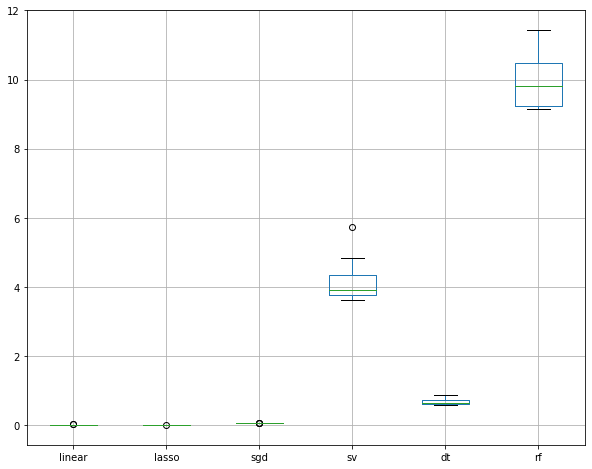

In [21]:
training_latencies_df.boxplot(figsize=(10, 8))